In [114]:
import pandas as pd
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import os

In [115]:
dir_path = "FinanceDB/Assets"


df_price = pd.read_csv(f'{dir_path}/corp_prices/RELIANCE_10yr_price_md.csv')

In [116]:
df_price.set_index('date', inplace=True)
df_price = df_price.drop('symbol',axis=1)

In [117]:
df_price = df_price.drop('Unnamed: 0', axis=1)
df_price = df_price.drop('dividends', axis=1)
df_price.head()

,low,volume,open,high,close,adjclose,splits,max_dv,close_dv,mov_1d,vol_1d
date,,,,,,,,,,,
1996-01-01,15.754989,48051995.0,15.859429,15.944529,15.917452,10.543346,0.0,0.012030,0.003659,NaN,NaN
1996-01-02,15.677626,77875009.0,15.878770,15.956133,15.793671,10.461358,0.0,0.017765,-0.005359,-0.007776,0.620640
1996-01-03,15.878770,96602936.0,16.052837,16.783918,15.913584,10.540785,0.0,0.057004,-0.008675,0.007592,0.240487
1996-01-04,15.553845,100099436.0,15.762726,15.813012,15.766594,10.443419,0.0,0.016663,0.000245,-0.009237,0.036195
1996-01-05,15.522900,76935930.0,15.704703,15.704703,15.658285,10.371678,0.0,0.011712,-0.002956,-0.006870,-0.231405


In [118]:
df_price = df_price.drop('splits', axis=1)
df_price.head()

,low,volume,open,high,close,adjclose,max_dv,close_dv,mov_1d,vol_1d
date,,,,,,,,,,
1996-01-01,15.754989,48051995.0,15.859429,15.944529,15.917452,10.543346,0.012030,0.003659,NaN,NaN
1996-01-02,15.677626,77875009.0,15.878770,15.956133,15.793671,10.461358,0.017765,-0.005359,-0.007776,0.620640
1996-01-03,15.878770,96602936.0,16.052837,16.783918,15.913584,10.540785,0.057004,-0.008675,0.007592,0.240487
1996-01-04,15.553845,100099436.0,15.762726,15.813012,15.766594,10.443419,0.016663,0.000245,-0.009237,0.036195
1996-01-05,15.522900,76935930.0,15.704703,15.704703,15.658285,10.371678,0.011712,-0.002956,-0.006870,-0.231405


In [119]:
dfp['max_dv'] = dfp['max_dv'] * 100
dfp['mov_1d'] = dfp['mov_1d'] * 100
dfp['close_dv'] = dfp['close_dv'] * 100
dfp['vol_1d'] = dfp['vol_1d'] * 100
dfp = dfp[['low','volume','open','high','adjclose','max_dv', 'close_dv','mov_1d','vol_1d']]
dfp.replace([np.inf, -np.inf], np.nan, inplace=True)
dfp.head()
dfp.fillna(-9999, inplace=True)
forecast_col = 'close'
forecast_out = int(math.ceil(0.01*len(df_price)))
dfp = df_price
print(len(dfp))

6384


In [120]:
dfp['label'] = dfp[forecast_col].shift(-forecast_out)
dfp.replace([np.inf, -np.inf], np.nan, inplace=True)
dfp.fillna(-9999, inplace=True)
print(len(dfp))

6384


In [121]:
X = np.array(dfp.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfp['label'])
y= y[:-forecast_out]

dfp.fillna(-9999,inplace=True)

print(X.shape)
print(y.shape)

(6320, 10)
(6320,)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
clf = LinearRegression()
conf=clf.fit(X_train, y_train)
print(conf)

LinearRegression()


In [124]:
conf = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)

In [125]:
print(forecast_set, confidence, forecast_out)


[2157.90500947 2189.11322012 2208.2029869  2067.10969644 2117.54840998
 2322.2490232  2200.4316476  2144.93390642 2148.48462727 2477.49251332
 2191.82329649 2312.03395342 2347.87805242 2287.81543917 2235.66941651
 2299.12321321 2219.37884842 2127.91854529 2168.69286227 2184.66090474
 2366.51051448 2092.32708077 2198.39856344 2087.23942956 2115.52870765
 2030.40174741 2140.9405497  2113.58271218 2033.442418   2082.65115302
 2013.17298324 2132.53300311 2027.06053878 2001.98032894 2016.96473223
 1944.95224353 2032.66301729 1949.85047338 1923.54437775 1925.46339395
 1956.63431453 1921.17261237 2044.84435129 2115.0799478  2011.74837229
 2075.40676265 2091.63880992 2001.11298569 2030.79945003 1955.10671633
 1948.51532237 1971.56263993 1945.24800047 1963.21627685 1926.98410474
 1971.12834468 1999.22282695 2022.98453621 2079.71673543 2018.82997522
 2013.94883957 2001.89830993 2004.46762865 1949.5213405 ] 0.5766586543487882 64


In [129]:
dfp['Forecast'] = np.nan
last_date = dfp.iloc[-1].name
last_date = pd.to_datetime(last_date)
last_date

Timestamp('2021-05-26 00:00:00')

In [130]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix+one_day

In [136]:
import datetime
for i in forecast_set:
    next_date =datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    dfp.loc[next_date] = [np.nan for _ in range(len(dfp.columns) - 1)]+ [i]

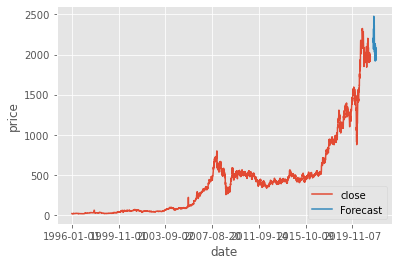

In [137]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


dfp['close'].plot()
dfp['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

In [138]:
import pickle
with open('PricePred_LR.pickle','wb') as f:
    pickle.dump(clf,f)